In [1]:
import pandas as pd

Cleaning

In [2]:
df = pd.read_csv("train.csv")
pd.options.display.max_columns=30
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,Yes,66,Bachelor’s Degree,Single,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,No,42,Associate Degree,Single,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,Yes,34,Master’s Degree,Married,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,No,62,Bachelor’s Degree,Single,0,Entry,Large,9,No,No,No,Good,Low,Left


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [4]:
#remove : Innovation Opportunities,Leadership Opportunities,Employee ID 3
#binary : Gender,Overtime,Remote Work,Attrition 4
#one-hot: Job Role,Marital Status 2
#int    : Work-Life Balance,Job Satisfaction,Performance Rating,Education Level,Job Level,Company Size,Company Reputation,Employee Recognition 8
#keep   : Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure  7

In [5]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x=='Male' else 0)
df["Overtime"] = df["Overtime"].apply(lambda x: 1 if x=='Yes' else 0)
df["Remote Work"] = df["Remote Work"].apply(lambda x: 1 if x=='Yes' else 0)
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x=='Left' else 0)

In [6]:
df = pd.get_dummies(df, columns=["Job Role"], dtype=int)
df = pd.get_dummies(df, columns=["Marital Status"], dtype=int)

In [7]:
df = df.drop("Employee ID",axis=1)
df = df.drop("Innovation Opportunities",axis=1)
df = df.drop("Leadership Opportunities",axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      59598 non-null  int64 
 1   Gender                   59598 non-null  int64 
 2   Years at Company         59598 non-null  int64 
 3   Monthly Income           59598 non-null  int64 
 4   Work-Life Balance        59598 non-null  object
 5   Job Satisfaction         59598 non-null  object
 6   Performance Rating       59598 non-null  object
 7   Number of Promotions     59598 non-null  int64 
 8   Overtime                 59598 non-null  int64 
 9   Distance from Home       59598 non-null  int64 
 10  Education Level          59598 non-null  object
 11  Number of Dependents     59598 non-null  int64 
 12  Job Level                59598 non-null  object
 13  Company Size             59598 non-null  object
 14  Company Tenure           59598 non-nul

In [9]:
df['Work-Life Balance'].unique()

array(['Excellent', 'Poor', 'Good', 'Fair'], dtype=object)

In [10]:
wlbmap={
    'Excellent': 4,
    'Good': 3,
    'Fair': 2,
    'Poor':1
}
df['Work-Life Balance'] = df['Work-Life Balance'].map(wlbmap).fillna(0)

In [11]:
df["Job Satisfaction"].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [12]:
jsmap={
    'Very High': 4,
    'High': 3,
    'Medium': 2,
    'Low':1
}
df["Job Satisfaction"] = df["Job Satisfaction"].map(jsmap).fillna(0)

In [13]:
df["Performance Rating"].unique()

array(['Average', 'Low', 'High', 'Below Average'], dtype=object)

In [14]:
prmap={
    'High': 4,
    'Average': 3,
    'Below Average': 2,
    'Low':1
}
df["Performance Rating"] = df["Performance Rating"].map(prmap).fillna(0)

In [15]:
df["Education Level"].unique()

array(['Associate Degree', 'Master’s Degree', 'Bachelor’s Degree',
       'High School', 'PhD'], dtype=object)

In [16]:
elmap={
    'PhD': 5,
    'Master’s Degree':4,
    'Bachelor’s Degree': 3,
    'Associate Degree': 2,
    'High School':1
}
df["Education Level"] = df["Education Level"].map(elmap).fillna(0)

In [17]:
df["Job Level"].unique()

array(['Mid', 'Senior', 'Entry'], dtype=object)

In [18]:
jlmap={
    'Senior': 3,
    'Mid': 2,
    'Entry':1
}
df["Job Level"] = df["Job Level"].map(jlmap).fillna(0)

In [19]:
df["Company Size"].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [20]:
csmap={
    'Large': 3,
    'Medium': 2,
    'Small':1
}
df["Company Size"] = df["Company Size"].map(csmap).fillna(0)

In [21]:
df["Company Reputation"].unique()

array(['Excellent', 'Fair', 'Poor', 'Good'], dtype=object)

In [22]:
crmap={
    'Excellent': 4,
    'Good': 3,
    'Fair': 2,
    'Poor':1
}
df["Company Reputation"] = df["Company Reputation"].map(crmap).fillna(0)

In [23]:
df["Employee Recognition"].unique()

array(['Medium', 'Low', 'High', 'Very High'], dtype=object)

In [24]:
ermap={
    'Very High': 4,
    'High': 3,
    'Medium': 2,
    'Low':1
}
df["Employee Recognition"] = df["Employee Recognition"].map(ermap).fillna(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      59598 non-null  int64
 1   Gender                   59598 non-null  int64
 2   Years at Company         59598 non-null  int64
 3   Monthly Income           59598 non-null  int64
 4   Work-Life Balance        59598 non-null  int64
 5   Job Satisfaction         59598 non-null  int64
 6   Performance Rating       59598 non-null  int64
 7   Number of Promotions     59598 non-null  int64
 8   Overtime                 59598 non-null  int64
 9   Distance from Home       59598 non-null  int64
 10  Education Level          59598 non-null  int64
 11  Number of Dependents     59598 non-null  int64
 12  Job Level                59598 non-null  int64
 13  Company Size             59598 non-null  int64
 14  Company Tenure           59598 non-null  int64
 15  Re

In [26]:
df

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Company Reputation,Employee Recognition,Attrition,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,31,1,19,5390,4,2,3,2,0,22,2,0,2,2,89,0,4,2,0,1,0,0,0,0,0,1,0
1,59,0,4,5534,1,3,1,3,0,21,4,3,2,2,21,0,2,1,0,0,0,0,1,0,1,0,0
2,24,0,10,8159,3,3,1,0,0,11,3,3,2,2,74,0,1,1,0,0,0,1,0,0,0,1,0
3,36,0,7,3989,3,3,4,1,0,27,1,2,2,1,50,1,3,2,0,1,0,0,0,0,0,0,1
4,56,1,41,4821,2,4,3,0,1,71,1,0,3,2,68,0,2,2,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,4414,2,3,3,1,1,66,3,2,3,1,35,0,1,4,1,1,0,0,0,0,0,0,1
59594,18,1,4,8040,2,3,4,3,0,42,2,0,3,2,73,0,2,2,1,0,0,1,0,0,0,0,1
59595,22,0,14,7944,2,3,4,0,1,34,4,2,1,1,29,0,3,2,0,0,0,0,0,1,0,1,0
59596,23,1,8,2931,2,4,3,0,0,62,3,0,1,3,9,0,3,1,1,1,0,0,0,0,0,0,1


In [29]:
df.corr()

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Company Reputation,Employee Recognition,Attrition,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
Age,1.000000,-0.003228,0.539806,-0.001989,0.007614,0.001730,0.002166,0.000167,-0.001997,-0.007063,0.006068,0.002927,-0.004416,-0.000248,0.237048,0.000057,-0.004307,-0.000617,-0.048900,0.004731,-0.000874,-0.003857,-0.001270,0.001061,-0.002069,-0.004998,0.006784
Gender,-0.003228,1.000000,-0.001445,-0.001775,0.005336,0.005444,0.006400,0.000821,-0.003055,-0.001766,-0.002056,0.005065,0.004139,0.005311,0.000211,0.000958,-0.005830,-0.002702,-0.101825,0.010180,0.003187,-0.000479,-0.005904,-0.006569,-0.003159,0.000244,0.002100
Years at Company,0.539806,-0.001445,1.000000,-0.005288,0.004232,-0.000541,0.000821,-0.000229,-0.004151,-0.006888,0.005805,0.003973,0.003032,0.000936,0.442180,0.000552,-0.005530,-0.005988,-0.064909,0.000802,0.000547,0.001375,0.000992,-0.003325,-0.002604,-0.000339,0.002298
Monthly Income,-0.001989,-0.001775,-0.005288,1.000000,0.001834,-0.007708,0.004123,0.006418,-0.004720,-0.002528,-0.002876,0.002582,-0.005545,0.003115,-0.005397,-0.002129,-0.003006,-0.003219,-0.011377,-0.671048,0.224810,0.177002,-0.266500,0.497896,-0.003394,0.007180,-0.004997
Work-Life Balance,0.007614,0.005336,0.004232,0.001834,1.000000,-0.005977,0.004881,-0.008196,-0.011990,0.009042,-0.001882,0.000092,0.000905,0.004480,0.008541,-0.000126,-0.000032,-0.001892,-0.183987,-0.001869,0.005599,0.002649,-0.005152,-0.000928,-0.004956,-0.001243,0.005000
Job Satisfaction,0.001730,0.005444,-0.000541,-0.007708,-0.005977,1.000000,0.000653,0.001677,0.000252,0.004039,-0.001805,0.004815,-0.003306,0.006573,0.002206,-0.000415,0.004451,0.005952,0.012928,0.010479,-0.006573,-0.002859,0.001912,-0.003374,-0.000548,0.004621,-0.004436
Performance Rating,0.002166,0.006400,0.000821,0.004123,0.004881,0.000653,1.000000,0.005278,0.009047,-0.002260,-0.005031,0.002273,-0.000876,-0.001883,-0.001504,0.008826,0.004911,-0.001422,-0.052131,-0.002247,0.004557,-0.003949,0.000608,0.001745,0.004606,0.001155,-0.004647
Number of Promotions,0.000167,0.000821,-0.000229,0.006418,-0.008196,0.001677,0.005278,1.000000,-0.002901,-0.007882,0.004863,-0.000558,0.001002,-0.001068,0.003903,0.004626,0.005864,-0.001308,-0.080591,-0.003974,0.011098,-0.003453,-0.003036,0.000738,-0.001872,-0.001745,0.003226
Overtime,-0.001997,-0.003055,-0.004151,-0.004720,-0.011990,0.000252,0.009047,-0.002901,1.000000,0.002298,0.001723,0.002115,-0.003246,0.001362,0.000169,0.000907,0.000862,-0.000929,0.055664,-0.003179,-0.001284,-0.003757,0.007260,0.001488,0.001624,0.004468,-0.005896
Distance from Home,-0.007063,-0.001766,-0.006888,-0.002528,0.009042,0.004039,-0.002260,-0.007882,0.002298,1.000000,-0.003663,0.000659,-0.002731,-0.007362,-0.005595,-0.002449,0.001496,0.001975,0.095570,-0.000864,0.003895,0.001425,0.000544,-0.004105,-0.003342,-0.004168,0.006864


In [27]:
import matplotlib.pyplot as plt

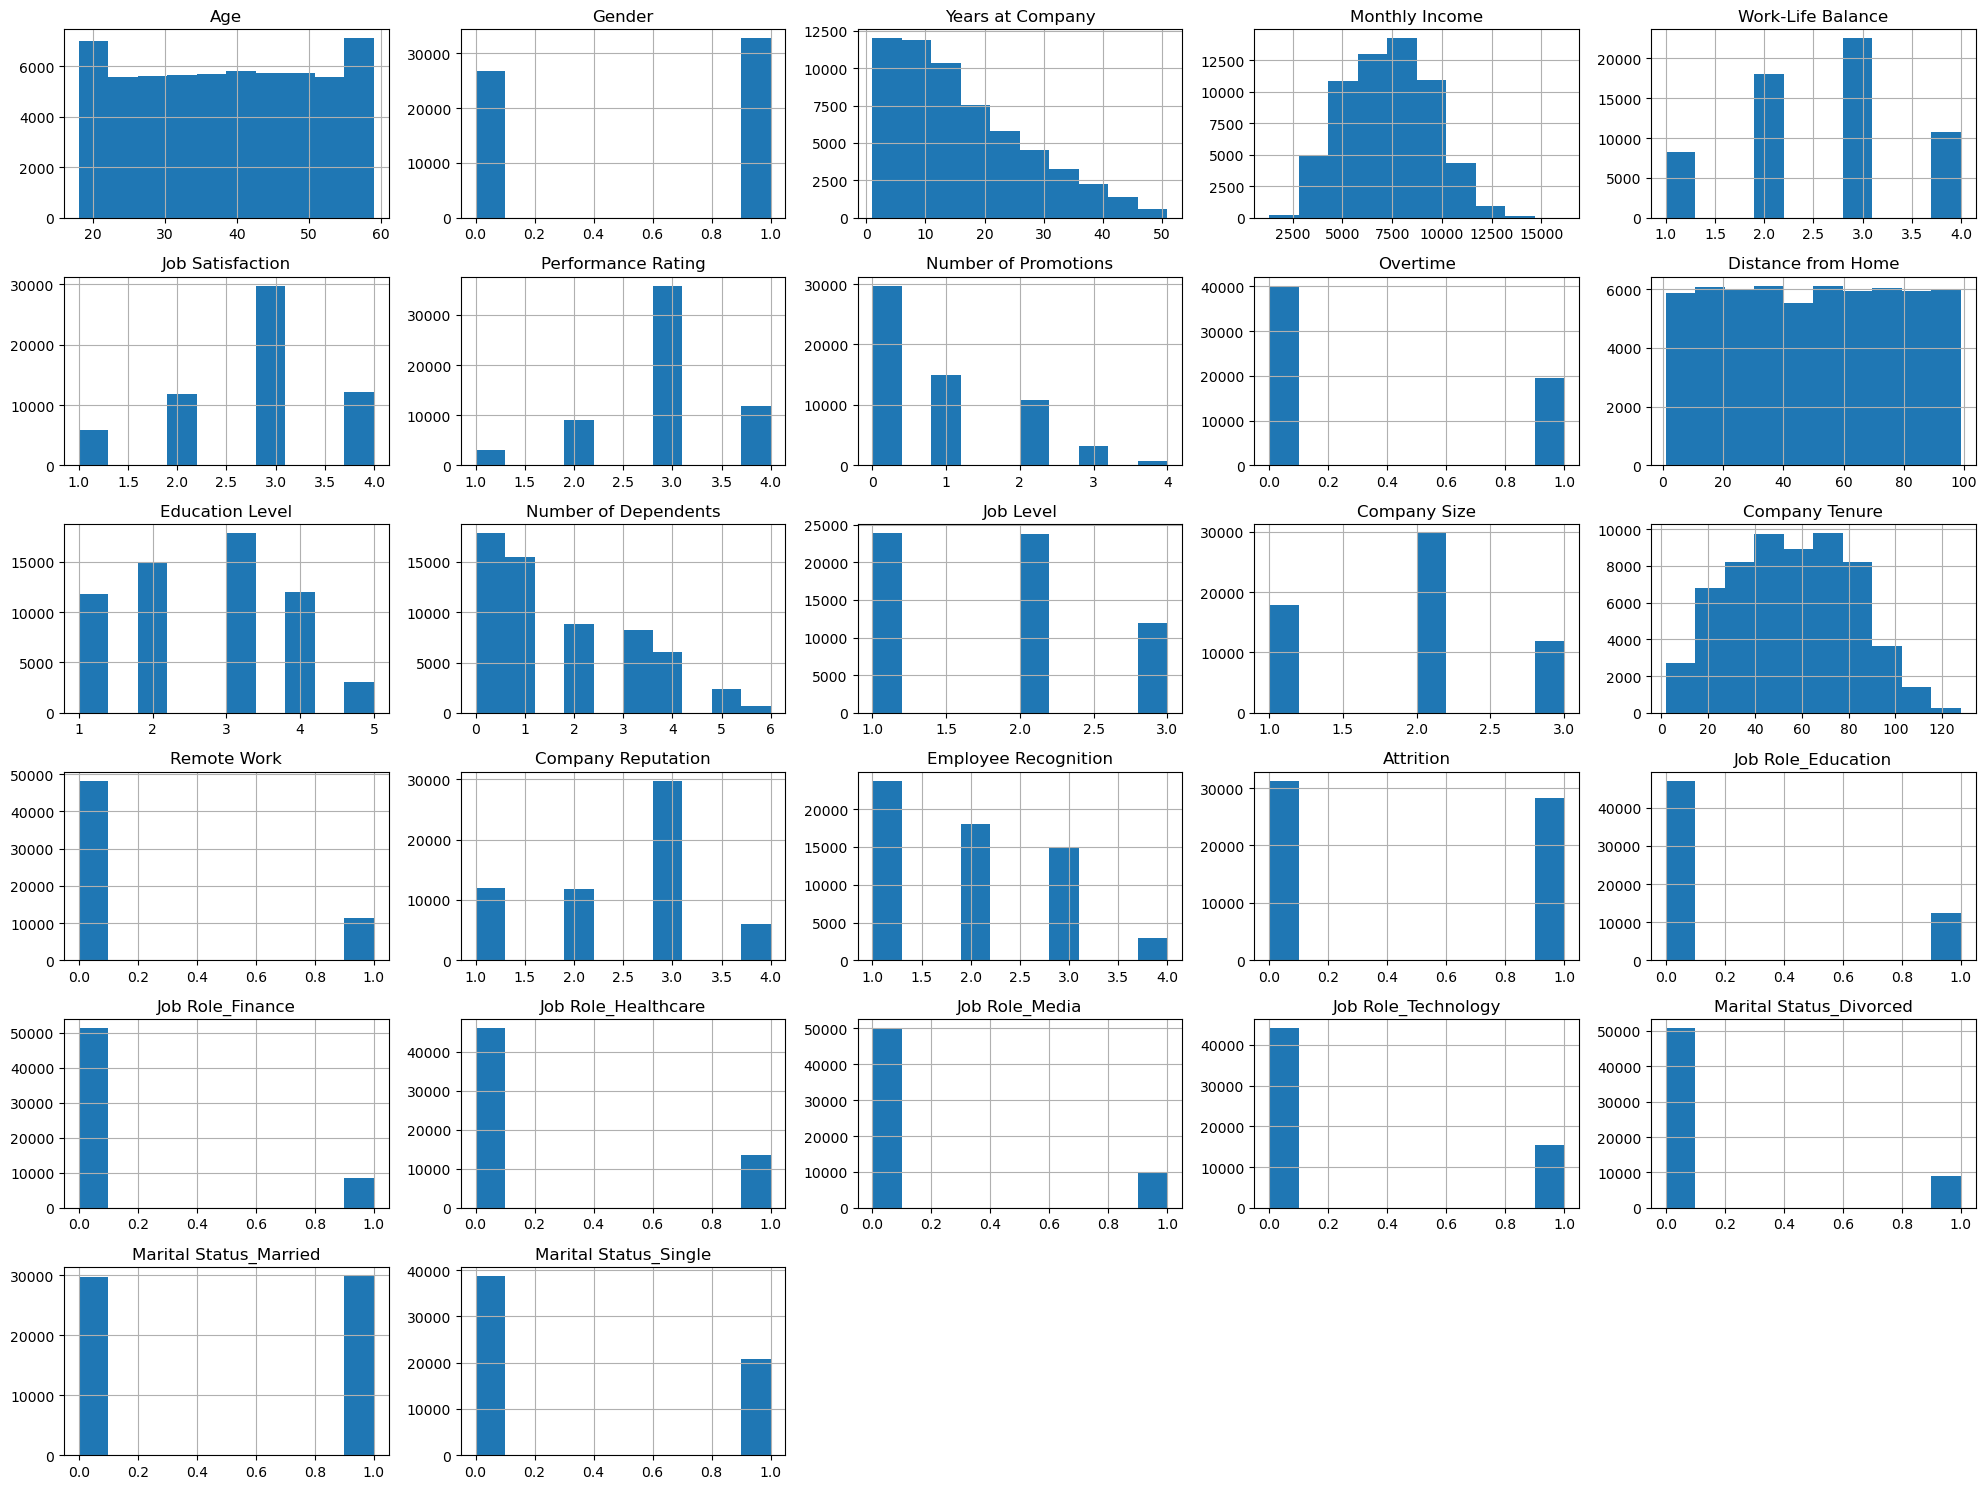

In [28]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

Training